In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
import requests
import json
import os

In [89]:
# Process the hw and lab grades for every user

In [83]:
hw_dir = '/Users/scottye/Desktop/Capstone/Data_set/capstone/F21/LB'
hw_list = []
for filename in os.listdir(hw_dir):
    f = os.path.join(hw_dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
        hw_list.append(f)

In [84]:
hw_list.sort()
hw_list

In [86]:
cols_list = ['ID number', 'Grade/20.00']
df = pd.read_csv(hw_list[0], usecols=cols_list)
df.rename(columns={"Grade/20.00": str(0)}, inplace=True)
df.drop_duplicates(subset='ID number', keep="last", inplace=True)

for i in range(1, len(hw_list)):
    df_next = pd.read_csv(hw_list[i], usecols=cols_list)
    df_next.rename(columns={"Grade/20.00": str(i)}, inplace=True)
    df_next.drop_duplicates(subset='ID number', keep="last", inplace=True)
    df = pd.merge(df, df_next, how='outer', on='ID number')
    


In [88]:
df.to_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F21/LB/lb_grades_20.csv', encoding='utf-8', index=False)

In [ ]:
# Regression ME grade on #lab and hw average grade

In [142]:
df_hw = pd.read_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F21/HW/hw_grades_21.csv')
df_lb = pd.read_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F21/LB/lb_grades_21.csv')

df_hw = df_hw[['ID number', 'average']]
df_lb = df_lb[['ID number', 'counts']]

df_lb = df_lb[:-1]
df_hw = df_hw[:-1]
df_hw['ID number'] = df_lb['ID number'].astype(int)

df = pd.merge(df_hw, df_lb, how='inner', on='ID number')
df = df[df['average'] != '#DIV/0!']


In [144]:
df_me = pd.read_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F21/ME/ME-1.csv')
df = pd.merge(df, df_me[['ID number','Grade/20.00']], on='ID number')
df.rename(columns={"Grade/20.00": 'me_grade'}, inplace=True)
df.dropna()
df.to_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F21/stats.csv', encoding='utf-8', index=False)

In [ ]:
# F20

In [149]:
df = pd.read_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F20/stats.csv')

In [151]:
x = np.array(df['average'])
y = np.array(df['me_grade'])

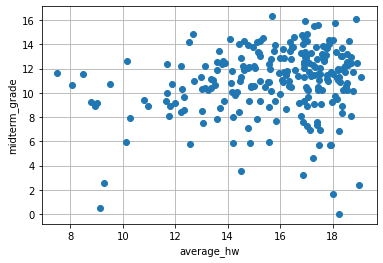

In [153]:
plt.plot(x,y,'o')
plt.xlabel('average_hw')
plt.ylabel('midterm_grade')
plt.grid(True)

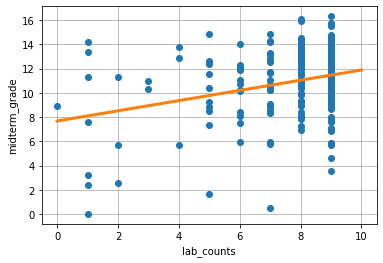

In [155]:
x = np.array(df['counts'])
y = np.array(df['me_grade'])
plt.plot(x,y,'o')
plt.xlabel('lab_counts')
plt.ylabel('midterm_grade')
plt.grid(True)

beta1 = 0.42107
beta0 = 7.67805
xplt = np.array([0,10])          
yplt = beta1*xplt + beta0
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line

In [156]:
df = pd.read_csv('/Users/scottye/Desktop/Capstone/Data_set/capstone/F20/HW/HW01.csv')
df['User full name'] = df['First name'] + ' ' + df['Surname']
df.to_csv('/Users/scottye/Desktop/try.csv', encoding='utf-8', index=False)

In [164]:
df